In [20]:
import numpy as np
import pandas as pd

In [21]:
cancer = pd.read_csv('breast-cancer-wisconsin.data')

In [22]:
cancer.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [23]:
#cleaning the dataset
#replace ? with -99999
cancer.replace('?',-99999,inplace=True)

In [24]:
#toss out unnecessary column(s)
cancer.drop('id',axis=1,inplace=True)

In [25]:
#split dataset into train and test
X = cancer.drop('class',axis=1)
y= cancer['class']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#split data across train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
#instantiate KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [42]:
#train the data
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
#check prediction accuracy
knn.score(X_test,y_test)

0.9785714285714285

In [44]:
#Figure out the best k to use
score_r = [] 

for i in range(1,40):
    knn_r = KNeighborsClassifier(n_neighbors=i)
    knn_r.fit(X_train,y_train)
    score_r.append(knn_r.score(X_test,y_test))

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

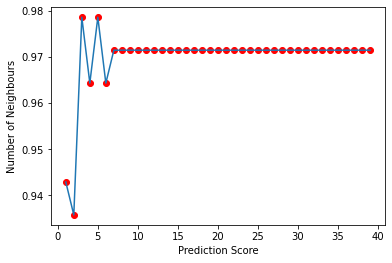

In [53]:
plt.plot(range(1,40),score_r)
plt.scatter(range(1,40),score_r,color='r')
plt.xlabel('Prediction Score')
plt.ylabel('Number of Neighbours')
plt.show()

In [14]:
#do a prediction using the original dataset
predictions = knn.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

#TRUE POSITIVE: predicted True, and case was True
#FALSE POSITIVE: predicted True, and case was False

[[88  2]
 [ 1 49]]
              precision    recall  f1-score   support

           2       0.99      0.98      0.98        90
           4       0.96      0.98      0.97        50

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [33]:
example = knn.predict([[3,2,1,1,2,1,2,1,1],[4,1,5,1,1,1,1,1,1]])

In [37]:
# print(confusion_matrix(y_test,example))
# print(classification_report(y_test,example))

len(predictions)

140